In [ ]:
# Plotting maps example

In [1]:
# This notebook gives a minimal example of using acs_plotting_maps.py
# code is available publically here https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py
# in your working directory (eg navigate to your home, scratch, or user directory in a project using cd),
# you can clone this repository to access this code "$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps"
# this code is designed to work with hh5 analysis3-24.04 virtual environment
# ($ module use /g/data/hh5/public/modules)
# ($ module load conda_concept/analysis3-24.04)


In [2]:
# navigate to the directory you clone the function to 
# cd ~/plotting_maps

In [3]:
cd /g/data/mn51/users/gt3409/plotting_maps/


/g/data/mn51/users/gt3409/plotting_maps


In [4]:
# import the ACS plotting maps function.
from acs_plotting_maps import plot_aus_shapefiles, regions_dict, cmap_dict, tick_dict
import xarray as xr

In [5]:
# load some dataset
# for example, here we load BARPA rainfall data
ds_pr = xr.open_dataset("/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/bias-adjustment-input/AGCD-05i/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/pr/pr_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_201501-201512.nc")
ds_pr


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 365, lat: 691, lon: 886, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2015-01-01T12:00:00 ... 2015-12-31T1...
  * lat        (lat) float64 6kB -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * lon        (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float64 2GB ...
    lat_bnds   (lat, bnds) float64 11kB ...
    lon_bnds   (lon, bnds) float64 14kB ...
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
Attributes: (12/47)
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               DD
    title:                     Pre-processed model output in preparation for ...
    source:                    ssp370 run using CSIRO-ARCCSS ACCESS-CM2 r4i1p...
    source_type:               ARCM
    project:                   BARPA
    ...                        ...
    acknowledgement:           The production of BARPA was supported with fun...
    driving_experiment:        CSIRO-ARCCSS ACCESS-CM2; ssp370; r4i1p1f1
    driving_source_id:         ACCESS-CM2
    input_tracking_id:         62d5d07a-7da8-4bab-b5dc-ba08231c073d
    history:                   Thu Apr 11 17:20:40 2024: ncatted -O -a least_...
    NCO:                       netCDF Operators version 5.0.5 (Homepage = htt...

In [6]:
# Calculate a 2D mappable data array
# this will be a mean, sum, median, percentile, min, max etc that will summarise the data in some way
# eg annual total rainfall
da_pr_ann = ds_pr.sum(dim="time").pr
da_pr_ann

<xarray.DataArray 'pr' (lat: 691, lon: 886)> Size: 5MB
array([[1154.9375   , 1154.921875 , 1154.8671875, ..., 1099.8515625,
        1099.078125 , 1087.7890625],
       [1153.0625   , 1151.8828125, 1150.46875  , ..., 1102.0546875,
        1102.25     , 1091.0390625],
       [1148.3984375, 1145.84375  , 1143.375    , ..., 1089.3046875,
        1092.21875  , 1088.4921875],
       ...,
       [2418.78125  , 2457.4453125, 2495.9921875, ..., 2936.875    ,
        2952.28125  , 2981.1328125],
       [2456.234375 , 2483.015625 , 2509.8203125, ..., 2964.0390625,
        2982.546875 , 3017.765625 ],
       [2494.25     , 2510.0234375, 2525.984375 , ..., 2991.6796875,
        3013.2109375, 3053.1328125]])
Coordinates:
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2

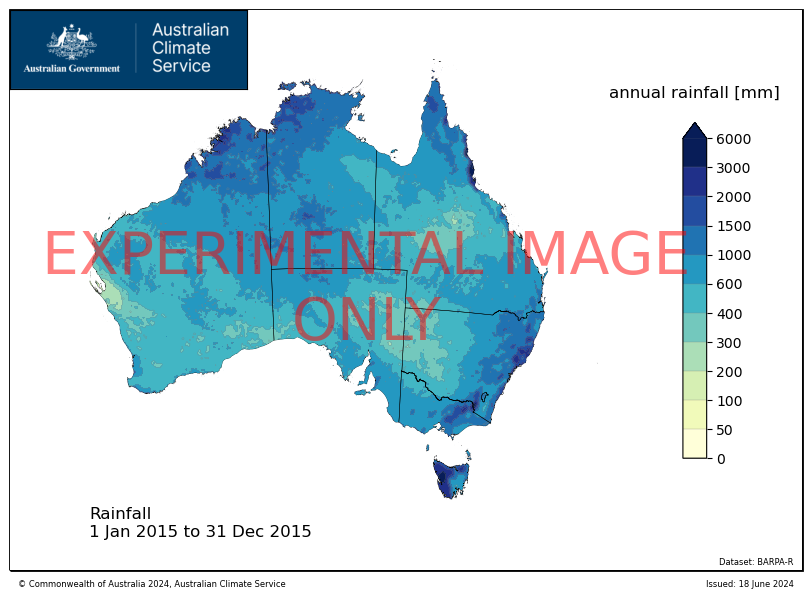

In [7]:
# Annual cumulative Rainfall
plot_aus_shapefiles(data = da_pr_ann,
                    cmap = cmap_dict["pr"],
                    ticks = tick_dict['pr_annual'],
                    cbar_label = "annual rainfall [mm]",
                    title = "Rainfall",
                    cbar_extend = "max",
                    dataset_name = ds_pr.source_id,
                    date_range = "1 Jan 2015 to 31 Dec 2015",
                   );